In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
path = r'C:\Users\erosb\08-2023 Instacart Basket Analysis'

In [3]:
#get most recent dataset
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

### #2 Charts

#### Bar chart

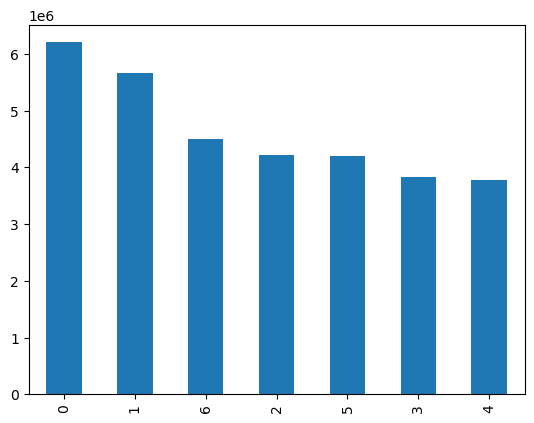

In [5]:
bar = df['orders_day_of_week'].value_counts().plot.bar()

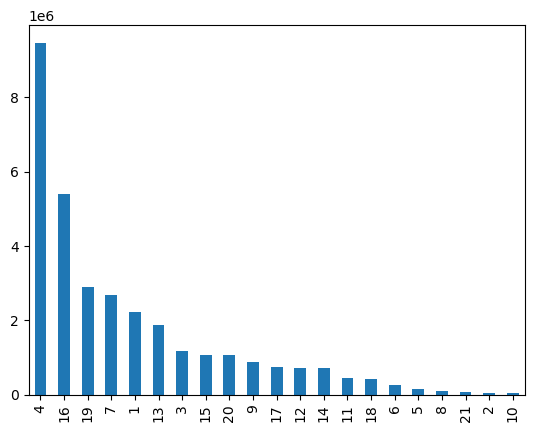

In [5]:
bar_2 = df['department_id'].value_counts().plot.bar()

In [7]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments.png'))

#### Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

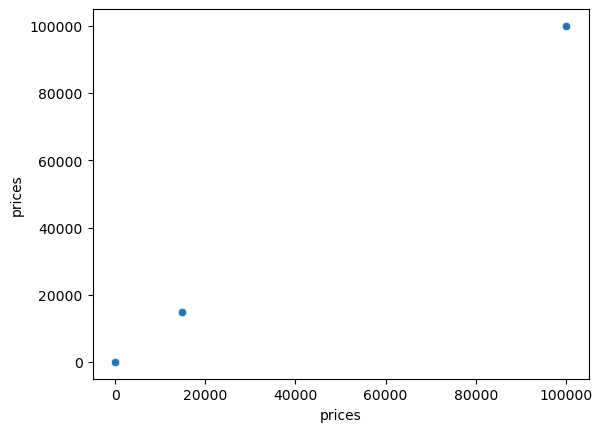

In [6]:
sns.scatterplot(x='prices', y='prices', data=df)

#### Histogram

In [7]:
#mark high prices (over $100) as missing
df.loc[df['prices']>100, 'prices'] = np.nan

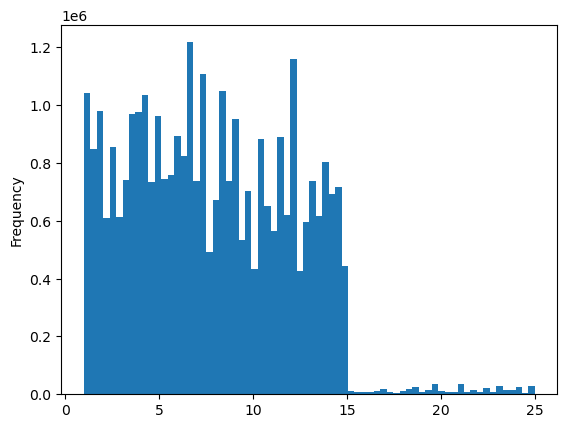

In [9]:
hist = df['prices'].plot.hist(bins=70)

#### Line chart

In [10]:
#use sample to reduce RAM usage
np.random.seed(4) #set the seed to represent a random but reproducible pattern
dev = np.random.rand(len(df)) <= 0.7 #rand ensures uniform distribution

In [11]:
big = df[dev] #storing the 70% of true values
small = df[~dev] #storing the 30% of false values

In [12]:
dev.shape

(32404859,)

In [13]:
len(df)

32404859

In [14]:
len(big)+len(small)

32404859

Checks all good

In [15]:
#reduce the columns to what is necessary
df_2 = small[['orders_day_of_week', 'prices']]

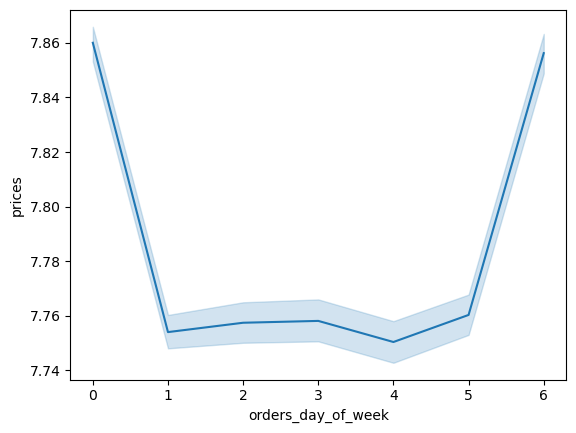

In [16]:
line = sns.lineplot(data = df_2, x='orders_day_of_week', y='prices')

### #3 Histogram

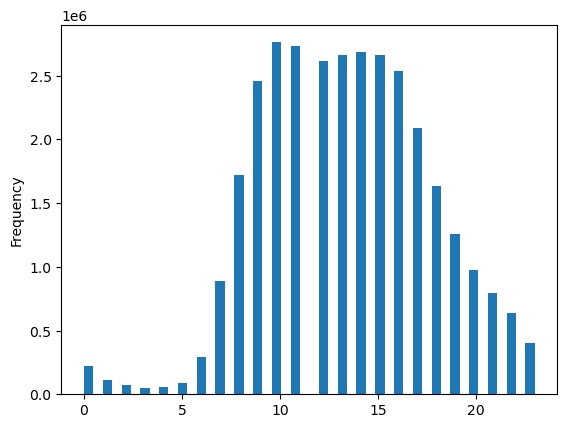

In [20]:
#hour_order_placed column
hist_2 = df['hour_order_placed'].plot.hist(bins=48)

This shows the distribution of times when customers place orders. The peak times are between 9-16 which represent 9am - 4pm.

In [21]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_times.png'))

### #4 Bar chart

In [1]:
#distribution of orders for loyalty
bar_2 = df['loyalty_flag'].value_counts().plot.bar()
bar_2.set_ylabel('orders')
plt.xticks(rotation=0)
bar_2

NameError: name 'df' is not defined

In [23]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))

### #5 Line - prices by hour

In [26]:
df_3 = small[['hour_order_placed', 'prices']]

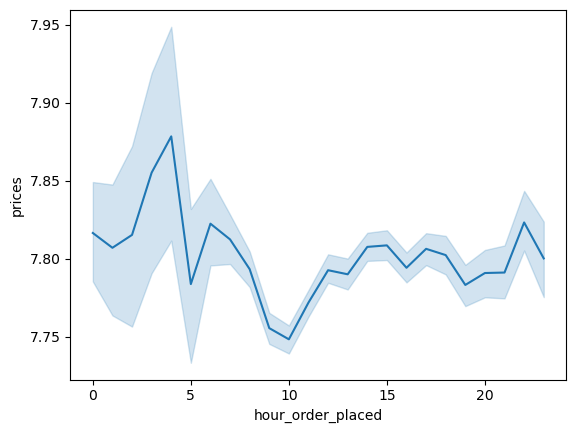

In [27]:
line_2 = sns.lineplot(data = df_3, x='hour_order_placed', y='prices')

In [28]:
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_hourly.png'))

### #6 Line - age and dependants

In [29]:
#display all column names
small.columns.values

array(['user_id', 'first_name', 'last_name', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id',
       'order_number', 'orders_day_of_week', 'hour_order_placed',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', '_merge', 'product_name', 'aisle_id', 'department_id',
       'prices', '_exist', 'price_range_loc', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'med_dspo', 'frequency_flag'], dtype=object)

In [30]:
df_4 = small[['Age', 'n_dependants']]

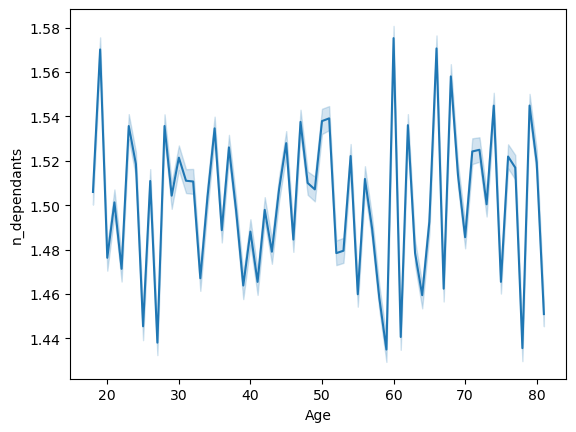

In [31]:
line = sns.lineplot(data = df_4, x='Age', y='n_dependants')

There is no obvious pattern here - we know in the entire dataset the min dependants is 0 and the max is 3. The sample here shows the min around 1.4 and the max 1.57. Clearly those are not possible numbers but instead are averages from all customers in that age group. The line peaks at around age 20, 60, and 66. 

In [33]:
line_2 = line

In [34]:
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dep.png'))

### #7 Scatter - age and income

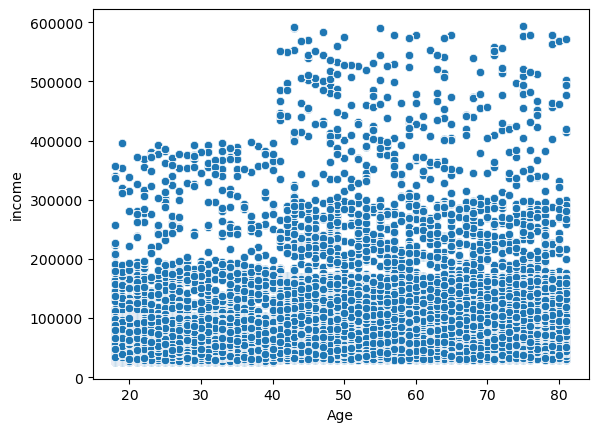

In [32]:
scatter = sns.scatterplot(x='Age', y='income', data=df)

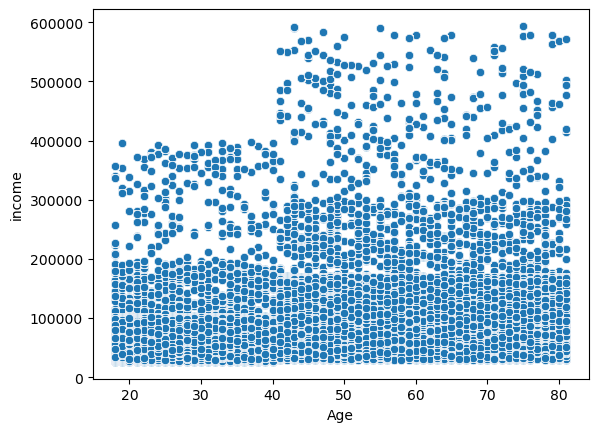

In [35]:
scatter_2 = sns.scatterplot(x='Age', y='income', data=small)

Both scatterplots look similarly busy even though the second uses the sample dataframe. It can still be concluded that the majority of incomes are under 300K with even more under 200K. For salaries above 200K though, age does positively correlate with income. There is no one under 40 making over 400K, for example.

In [36]:
scatter_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))